<a href="https://colab.research.google.com/github/JDLiu/DigitalImageProcessAtNCHU/blob/main/Boundray_Extraction_%26_Region_Filling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#掛載Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 環境初始化

In [ ]:
#載入框架
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import numpy as np
import os
import sys
%matplotlib inline

In [ ]:
#切換預設目錄
SYS_DIR = "/content/drive/My Drive/Colab Notebooks/DIP"
if not os.path.isdir(SYS_DIR):
    os.mkdir(SYS_DIR)
os.chdir(SYS_DIR)

In [ ]:
im_gray = cv2.imread('dl.jpg', cv2.IMREAD_GRAYSCALE)
thresh = 127
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
plt.imsave(im_bw,cmap='binary')

TypeError: ignored

In [ ]:
#定義Erotion和Dilation的函式
def add_padding(image, padding, value):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=value)
def operate(image, kernel, padding=0, operation=None):
      img_operated = image.copy()
      padding_value = 0          
      if operation == "e": 
          padding_value = 1     
      padded = add_padding(image, padding, padding_value) 
      w = padded.shape[0] - kernel.shape[0] #寬的結束點
      h = padded.shape[1] - kernel.shape[1] #高的結束點
      #從0開始處理
      w_pos = 0
      while w_pos <= w:
          h_pos = 0
          while h_pos <= h:
              dilation_flag = False
              erosion_flag = False
              for i in range(kernel.shape[0]):      
                  for j in range(kernel.shape[1]):  
                      if kernel[i][j] == 1:         
                          #erotion
                          if operation == "e":
                              if padded[w_pos+i][h_pos+j] == 0: 
                                  erosion_flag = True                           
                                  break
                          #dilation
                          elif operation == "d":
                              if padded[w_pos+i][h_pos+j] == 1: 
                                  dilation_flag = True
                                  break
                  if operation == "e" and erosion_flag:        
                      img_operated[w_pos, h_pos] = 0  
                      break
                  if operation == "d" and dilation_flag:       
                      img_operated[w_pos, h_pos] = 1
                      break
              h_pos += 1
          w_pos += 1
      return img_operated

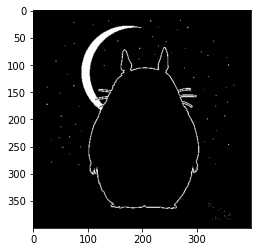

In [ ]:
image_pt = plt.imread('rf.jpg')
plt.imshow(image_pt)

In [ ]:
kernel = np.ones((3,3), np.uint8)
image_gry = cv2.cvtColor(image_pt, cv2.COLOR_BGR2GRAY)
#做erosion
erosion = operate(image_gry, kernel, 1, "e")

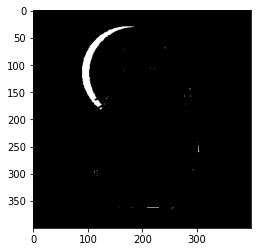

In [ ]:
plt.imshow(erosion,cmap='gray')

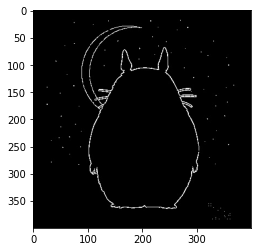

In [ ]:
#原圖和侵蝕後的結果相減得到邊緣
boundary_ex=image_gry-erosion
plt.imshow(boundary_ex,cmap='gray')

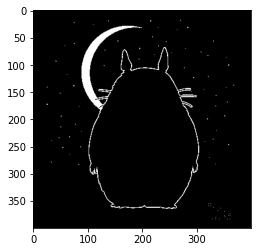

In [ ]:
image_dl = cv2.imread('rf.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image_dl,cmap='gray')

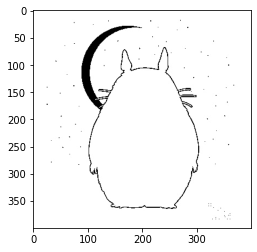

In [ ]:
image_dl_not =~image_dl
plt.imshow(image_dl_not,cmap='gray')

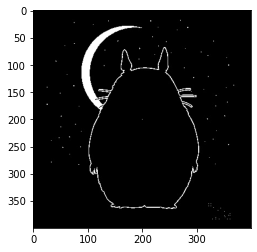

In [ ]:
#image_dl[400,80]=255
#image_dl[150,320]=255
image_dl[200,200]=255
plt.imshow(image_dl,cmap='gray')

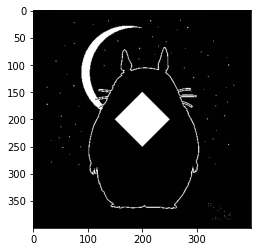

In [ ]:
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype='uint8')
#dialotion = cv2.dilate(image_dl, kernel, iterations = 1)
dialotion=operate(image_dl, kernel, 1, "d")
dl_reg =image_dl_not&dialotion
for i in range(50):
  dialotion = cv2.dilate(dl_reg, kernel, iterations = 1)
  #dialotion=operate(dl_reg, kernel, 1, "d")
  dl_reg =image_dl_not&dialotion
dl_or=dl_reg|image_dl
plt.imshow(dl_or,cmap='gray')